## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

df, target = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=42)
df = pd.DataFrame(df,columns=["a","b","c","d","e","f","g","h"])
target = pd.DataFrame(target,columns=["target"])

In [3]:
# Check duplicate values and missing data.

df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
dtype: int64

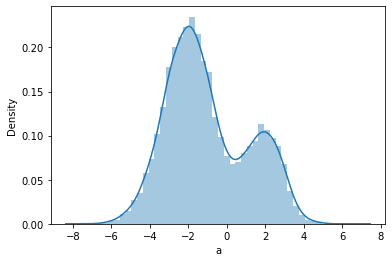

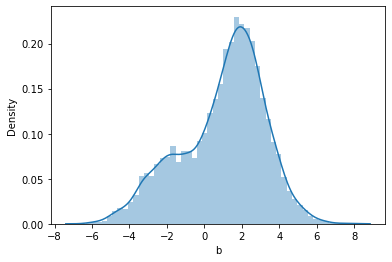

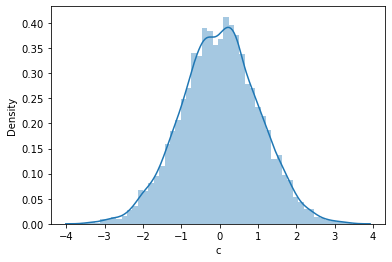

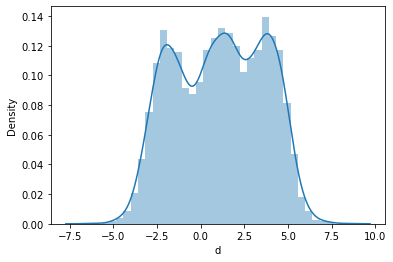

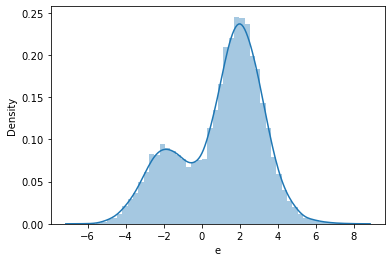

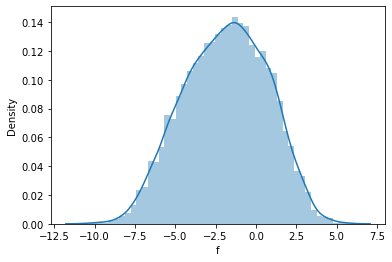

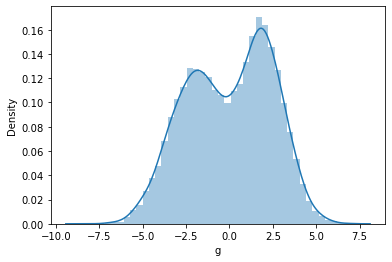

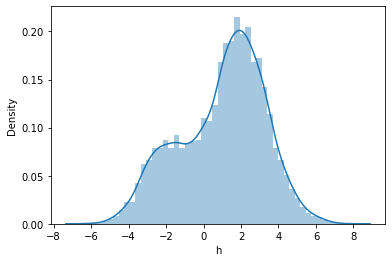

In [4]:
# Visualize data for each feature (pairplot,distplot).

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

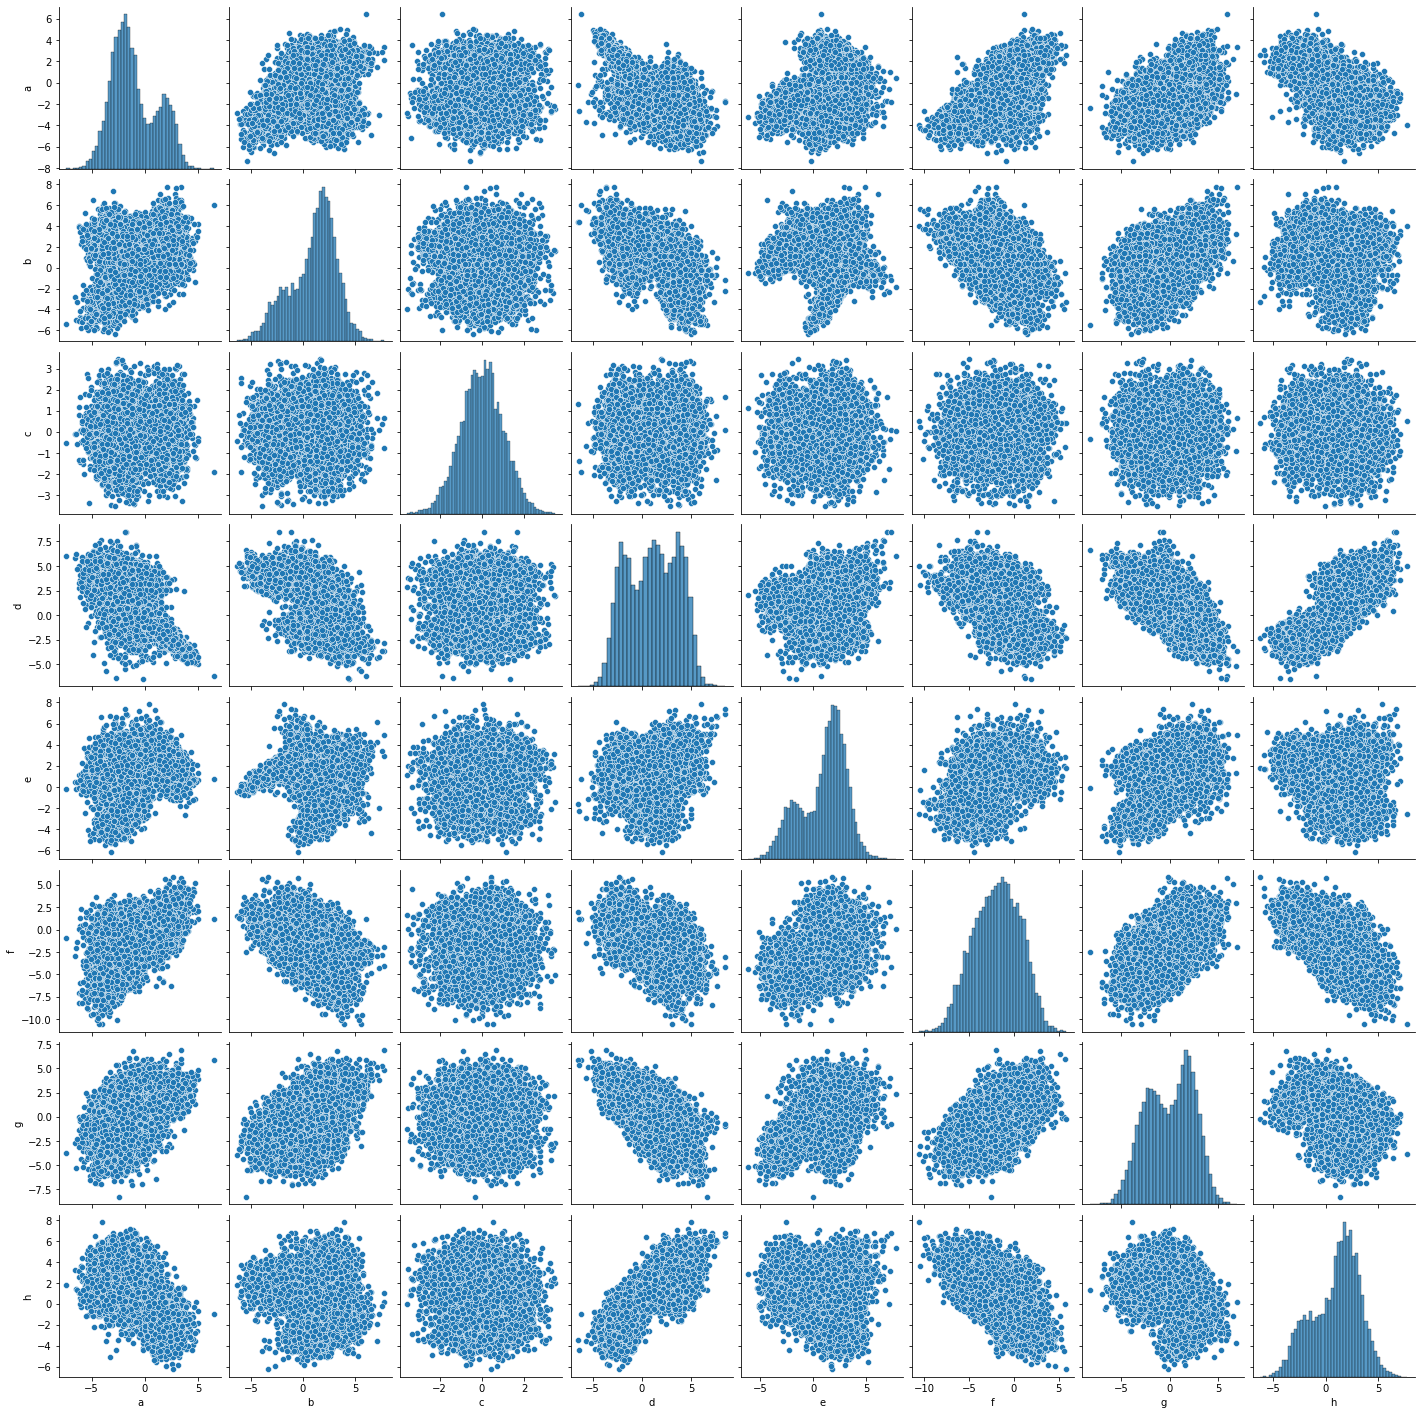

In [5]:
sns.pairplot(df);

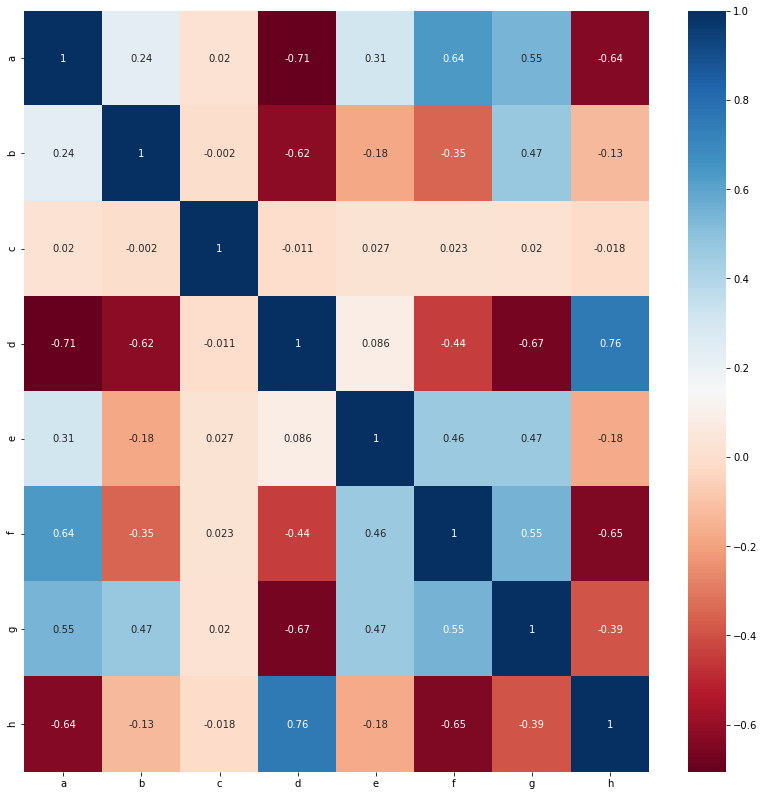

In [6]:
# Draw correlation matrix.

plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(),cmap="RdBu",annot=True);

In [7]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

from sklearn.ensemble import IsolationForest

iso = IsolationForest(random_state=42)
outliers = iso.fit_predict(df)
non_outliers_index = outliers != -1
df = df[non_outliers_index]
target = target[non_outliers_index]

In [8]:
# Split dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=4, shuffle=True)

In [9]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree_params = { "max_depth": range(1,7)}
dtree_cv = GridSearchCV(DecisionTreeClassifier(), dtree_params, cv=3, n_jobs = -1).fit(X_train, y_train)
dtree_tuned = DecisionTreeClassifier(max_depth=dtree_cv.best_params_["max_depth"]).fit(X_train, y_train)

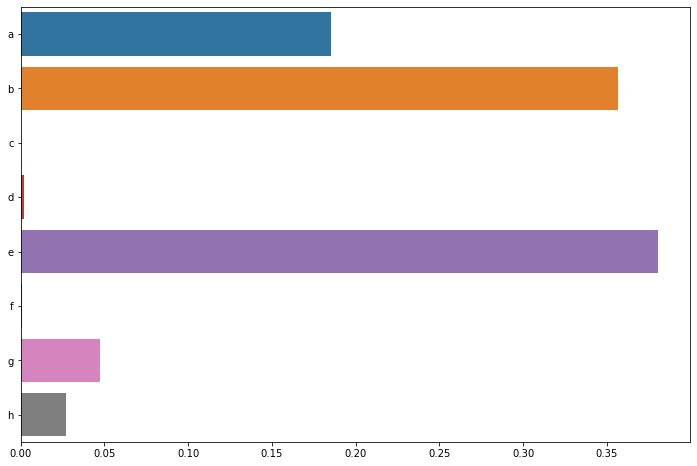

In [10]:
# Visualize feature importances.

plt.figure(figsize=(12, 8))
importance = dtree_tuned.feature_importances_
sns.barplot(x=importance, y=X_train.columns);

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1322
           1       0.98      0.96      0.97      1273

    accuracy                           0.97      2595
   macro avg       0.97      0.97      0.97      2595
weighted avg       0.97      0.97      0.97      2595



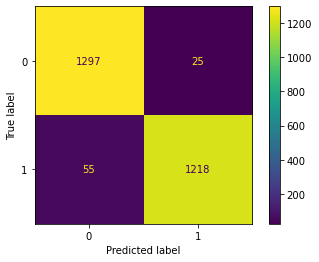

In [11]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

from sklearn.metrics import plot_confusion_matrix, classification_report

pred = dtree_tuned.predict(X_test)
print(classification_report(y_test,pred))
plot_confusion_matrix(dtree_tuned, X_test, y_test);

In [12]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

from xgboost.sklearn import XGBClassifier

xgb_params = {    'max_depth':range(3,8,2),
                  'min_child_weight':range(1,6,2),
                  'learning_rate': [0.001,0.01,0.1,1],
                  'n_estimators': [10,100,200,500,1000]}

xgb_cv = GridSearchCV(XGBClassifier(), xgb_params, cv=3, n_jobs = -1).fit(X_train, y_train)
xgb_tuned = XGBClassifier(max_depth=xgb_cv.best_params_["max_depth"],
                          min_child_weight=xgb_cv.best_params_["min_child_weight"],
                          learning_rate=xgb_cv.best_params_["learning_rate"], 
                          n_estimators=xgb_cv.best_params_["n_estimators"]).fit(X_train, y_train)

[20:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


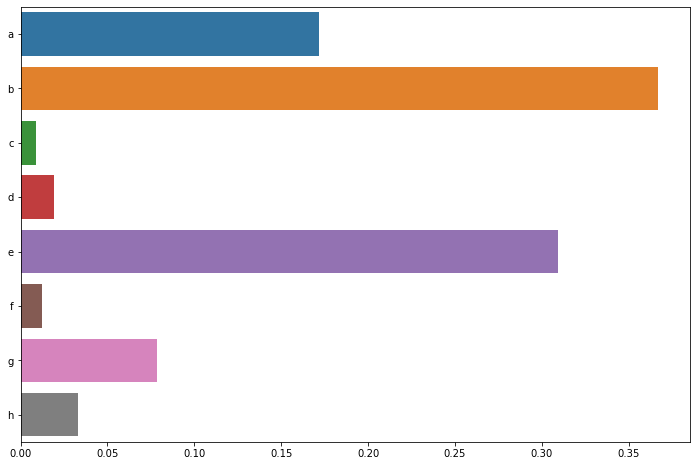

In [13]:
# Visualize feature importances.

plt.figure(figsize=(12, 8))
importance = xgb_tuned.feature_importances_
sns.barplot(x=importance, y=X_train.columns);

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1322
           1       0.99      0.99      0.99      1273

    accuracy                           0.99      2595
   macro avg       0.99      0.99      0.99      2595
weighted avg       0.99      0.99      0.99      2595



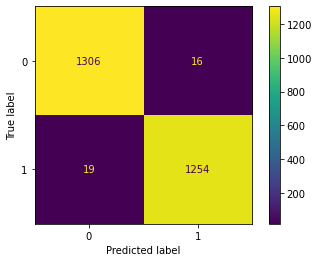

In [14]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

pred1 = xgb_tuned.predict(X_test)
print(classification_report(y_test,pred1))
plot_confusion_matrix(xgb_tuned, X_test, y_test);

In [15]:
# Evaluate your result and select best performing algorithm for our case.

## Sonuç:
* Her iki algoritmayla kurulan modellerin başarılı sonuçlar verdiği söylenebilir.  

* Hedef değişkendeki sınıfların dengeli şekilde dağıldığı kriterine dayanarak model başarısını accuracy ve f1-score metrikleriyle değerlendirmenin doğru olacağı düşünülmüştür. Bu bağlamda Xgboost modeliyle kurulan modelin %2 oranında daha başarılı tahmin gücüne sahip olması nedeniyle en iyi performans veren algoritma olarak değerlendirilmiştir.  

* Bununla birlikte her iki algoritmayla kurulan modelde "b" ve "e" isimli değişkenlerin(değişkenleri import işlemi sırasında a,b,c... şeklinde isimlendirdik) tahmin üzerinde en fazla etkiyi gösteren değişkenler olduğu tespit edilmiştir. Decision Tree modelinde e'nin etkisi daha fazlayken, Xgboost modelinde b'nin etkisinin daha fazla olduğu görülmüştür.